In [ ]:
# This script is for separating the text in each article section wise

In [ ]:
import nltk
nltk.download('punkt')
import json
from tqdm.notebook import tqdm
import os
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def process(article):
  # Divides text in each article section wise
  # Here it is assumed that a section starts with '==' and each level of subsection adds more '=' characters
  # For now, we are ignoring subsections and only taking sections into consideration

  MIN_SECTION_LENGTH = 10   # ignore sections that contain less than 10 characters
  
  processed_article = []
  article = article.split("\n")
  section = 'Introduction'
  text = ""
  
  for line in article:
    line = line.strip()
    line = line.replace('\n', '')
    if len(line) < 3:
      continue
    if line[0] == '=' and line[1] == '=' and line[2] == '=':
      # This denotes a subsection. Ignore this
      continue
    if line[0] == '=' and line[1] == '=' and line[2] != '=':
      # This denotes start of new section
      if len(text) >= MIN_SECTION_LENGTH:
        processed_article.append({
            'section': section,
            'text': text 
        })
      line = line.replace('=', '')
      section = line.strip()
      text = ""
    else:
      text += line
  return processed_article

In [ ]:
domain = 'cricketers'
file_name = domain + '_data.json'
with open(file_name) as f:
  data = json.load(f)

for idx, item in tqdm(enumerate(data)):
  article = process(item['article'])
  data[idx]['article'] = article


0it [00:00, ?it/s]

In [ ]:
if not os.path.isdir('section_wise_data/'):
  os.makedirs('section_wise_data')

output_file = "section_wise_data/" + domain + "_data.json"
with open(output_file, 'w') as f:
  f.write(json.dumps(data))

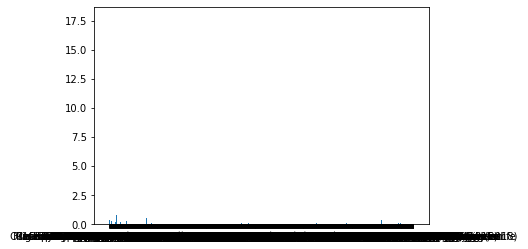

In [ ]:
domain = 'superheroes'
file_name = 'section_wise_data/' + domain + '_data.json'
with open(file_name) as f:
  data = json.load(f)

freq = {}           # stores average number of sentence in each section
total = 0
for item in data:
  article = item['article']
  found = False
  for section in article:
    section_name = section['section']
    text = section['text']
    if text == []:
      continue
    found = True
    sentences_num = len(sent_tokenize(text))
    if section_name not in freq.keys():
      freq[section_name] = 0
    freq[section_name] += sentences_num
  if found:
    total += 1
for key in freq.keys():
  freq[key] /= total

plt.bar(*zip(*freq.items()))
plt.show()